In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [3]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [5]:
bc.target.shape

(569,)

In [10]:
bc.target[500]

1

In [7]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [8]:
bc.data.shape

(569, 30)

# Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [12]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [13]:
y_train.shape, y_test.shape

((455,), (114,))

In [14]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [15]:
X_train

array([[0.62847272, 0.43102241, 0.6123281 , ..., 0.54054983, 0.41868717,
        0.18785255],
       [0.59486961, 0.43732493, 0.5881418 , ..., 0.62714777, 0.19929036,
        0.13760986],
       [0.23990724, 0.13690476, 0.23668026, ..., 0.22501718, 0.23299823,
        0.18345796],
       ...,
       [0.46377017, 0.28291317, 0.4526985 , ..., 0.50652921, 0.24541691,
        0.11307884],
       [0.22239576, 0.19082633, 0.21905881, ..., 0.33728522, 0.24423418,
        0.16528926],
       [0.29291495, 0.2780112 , 0.29154861, ..., 0.71752577, 0.46027991,
        0.41230487]])

# Classification


1. Naive Bayes

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test ):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    print(f"acc_train:{acc_train}- acc_test:{acc_test}-precision:{precision}-recall:{recall}")
    return acc_train, acc_test, precision, recall


In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [26]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [28]:
acc_train_gnb, acc_test_gnb, precision_gnb, recall_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc_train:0.945054945054945- acc_test:0.9210526315789473-precision:0.9066666666666666-recall:0.9714285714285714


2. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, algorithm="kd_tree", leaf_size=28)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=3)

In [31]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
acc_train_knn, acc_test_knn, precision_knn, recall_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc_train:0.9846153846153847- acc_test:0.9385964912280702-precision:0.9436619718309859-recall:0.9571428571428572


3. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=32,min_samples_split=4, min_samples_leaf=2, criterion="entropy")
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
acc_train_dt, acc_test_dt, precision_dt, recall_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc_train:0.9934065934065934- acc_test:0.9122807017543859-precision:0.9411764705882353-recall:0.9142857142857143


4. Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=32, min_samples_split=8)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
acc_train_rf, acc_test_rf, precision_rf, recall_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc_train:0.9934065934065934- acc_test:0.956140350877193-precision:0.9452054794520548-recall:0.9857142857142858


5. Support Vector Machine

In [58]:
from sklearn.svm import SVC
model = SVC(kernel="poly", C=5, gamma=0.9)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
acc_train_svm, acc_test_svm, precision_svm, recall_svm= calculate_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc_train:0.9912087912087912- acc_test:0.9824561403508771-precision:0.9857142857142858-recall:0.9857142857142858


6. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
acc_train_lr, acc_test_lr, precision_lr, recall_lr= calculate_metrics(y_train, y_test, y_pred_train, y_pred_test )

acc_train:0.9714285714285714- acc_test:0.9473684210526315-precision:0.9210526315789473-recall:1.0


7. Artificial Neural Network

In [66]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=256, activation="tanh", solver="adam", batch_size=64, max_iter=100)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
acc_train_ann, acc_test_ann, precision_ann, recall_ann= calculate_metrics(y_train, y_test, y_pred_train, y_pred_test )


acc_train:0.9868131868131869- acc_test:0.9649122807017544-precision:0.9583333333333334-recall:0.9857142857142858


/home/mohammad/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# Comparison

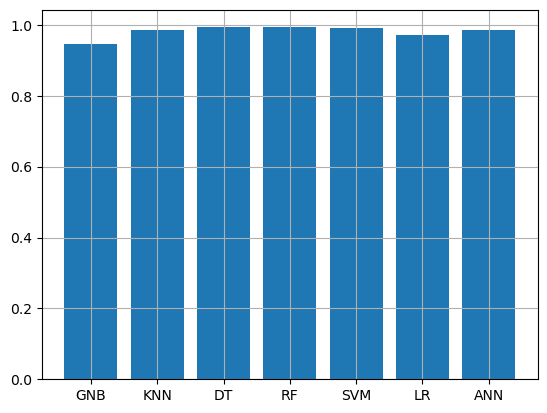

In [69]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title =["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

plt.bar(title,acc_train)
plt.grid()
plt.show()

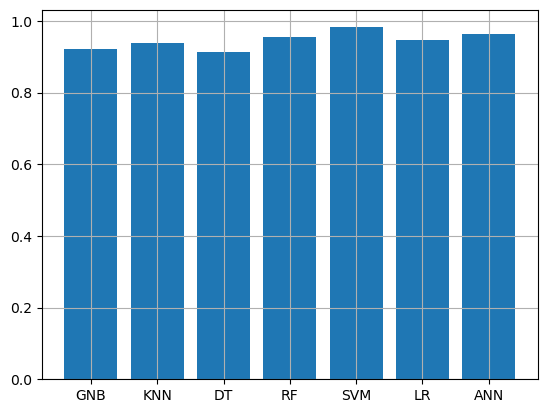

In [70]:
import matplotlib.pyplot as plt
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title =["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

plt.bar(title,acc_test)
plt.grid()
plt.show()

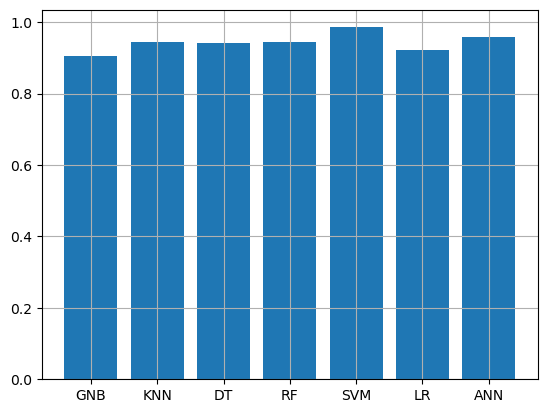

In [71]:
import matplotlib.pyplot as plt
precision = [precision_gnb, precision_knn, precision_dt, precision_rf, precision_svm, precision_lr, precision_ann]
title =["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

plt.bar(title,precision)
plt.grid()
plt.show()

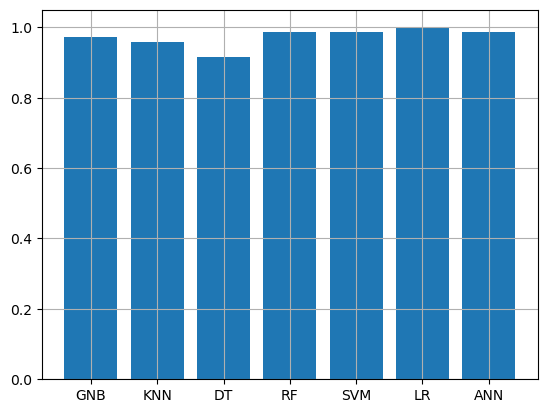

In [72]:
import matplotlib.pyplot as plt
recall = [recall_gnb, recall_knn, recall_dt, recall_rf, recall_svm, recall_lr, recall_ann]
title =["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

plt.bar(title,recall)
plt.grid()
plt.show()